In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Thyroid_Diff.csv")
X = dataset.drop("Recurred", axis=1)
y = dataset["Recurred"]

In [3]:
from sklearn.preprocessing import LabelEncoder
label_encode_cols = ['Risk', 'T', 'N', 'M', 'Stage', 'Response']
le = LabelEncoder()
for col in label_encode_cols:
    X[col] = le.fit_transform(X[col])

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
assert isinstance(X, pd.DataFrame)
onehot_encode_cols = ['Gender','Smoking','Hx Smoking','Hx Radiothreapy',
                      'Thyroid Function','Physical Examination','Adenopathy',
                      'Pathology','Focality']
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(drop='if_binary'), onehot_encode_cols)],
    remainder='passthrough'
)
X_transformed = ct.fit_transform(X)
# Get new column names
encoded_cols = ct.named_transformers_['encoder'].get_feature_names_out(onehot_encode_cols)
remaining_cols = [col for col in X.columns if col not in onehot_encode_cols]
all_cols = list(encoded_cols) + remaining_cols

# Convert to DataFrame with proper column names
X_df = pd.DataFrame(X_transformed, columns=all_cols)

In [5]:
y_encoded = LabelEncoder().fit_transform(y)
print(y_encoded)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y_encoded, random_state=0,test_size=0.2) 

In [7]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [8]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]]


In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

[[51  0]
 [ 2 24]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        51
           1       1.00      0.92      0.96        26

    accuracy                           0.97        77
   macro avg       0.98      0.96      0.97        77
weighted avg       0.98      0.97      0.97        77



In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
param_grid = {
    'C': [0.1, 1, 10],                    # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'], # Kernel type
    'gamma': ['scale', 'auto'],          # Kernel coefficient
}
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best params and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
print(best_model)
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Best Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'poly'}
Best Cross-Validation Accuracy: 0.941195134849286
SVC(C=1, gamma='auto', kernel='poly', random_state=0)
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        51
           1       0.85      0.88      0.87        26

    accuracy                           0.91        77
   macro avg       0.90      0.90      0.90        77
weighted avg       0.91      0.91      0.91        77



In [16]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],                 # Only relevant for 'poly'
    'coef0': [0.0, 0.1, 0.5],            # For 'poly' and 'sigmoid'
    'shrinking': [True, False],
    'class_weight': [None, 'balanced'],
    'decision_function_shape': ['ovo', 'ovr']
}
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best params and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
print(best_model)
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Best Parameters: {'C': 1, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovo', 'degree': 3, 'gamma': 'auto', 'kernel': 'poly', 'shrinking': True}
Best Cross-Validation Accuracy: 0.9478053939714435
SVC(C=1, class_weight='balanced', decision_function_shape='ovo', gamma='auto',
    kernel='poly', random_state=0)
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        51
           1       0.87      0.77      0.82        26

    accuracy                           0.88        77
   macro avg       0.88      0.86      0.87        77
weighted avg       0.88      0.88      0.88        77



In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy is: ', accuracy_score(y_test, y_pred))
print('Precision is: ', precision_score(y_test, y_pred, average='weighted'))    
print('Recall is: ', recall_score(y_test, y_pred, average='weighted'))
print('F1-score is: ', f1_score(y_test, y_pred, average='weighted'))

Accuracy is:  0.8831168831168831
Precision is:  0.8823640127987955
Recall is:  0.8831168831168831
F1-score is:  0.8812085873310362


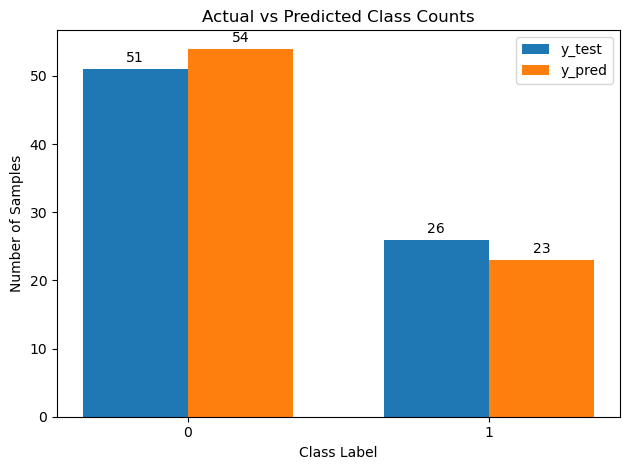

In [21]:
# def plot_results(y_test, y_pred):
#     fig = plt.figure()
#     plt.hist(y_test, align='left')
#     plt.hist(y_pred, align='right')
#     plt.legend(['y_test', 'y_pred'])
#     plt.xticks((0, 1))
#     plt.show()
# plot_results(y_test, y_pred)
def plot_results(y_test, y_pred):
    fig = plt.figure()
    
    # Count occurrences
    labels = [0, 1]
    y_test_counts = [np.sum(y_test == label) for label in labels]
    y_pred_counts = [np.sum(y_pred == label) for label in labels]
    
    x = np.arange(len(labels))  # [0, 1]
    width = 0.35  # width of the bars
    
    # Plot bars
    plt.bar(x - width/2, y_test_counts, width, label='y_test')
    plt.bar(x + width/2, y_pred_counts, width, label='y_pred')
    
    # Add value labels on top
    for i, count in enumerate(y_test_counts):
        plt.text(x[i] - width/2, count + 1, str(count), ha='center')
    for i, count in enumerate(y_pred_counts):
        plt.text(x[i] + width/2, count + 1, str(count), ha='center')
    
    # Labels and display
    plt.xticks(x, labels)
    plt.xlabel('Class Label')
    plt.ylabel('Number of Samples')
    plt.title('Actual vs Predicted Class Counts')
    plt.legend()
    plt.tight_layout()
    plt.show()
plot_results(y_test, y_pred)